# Sorghum Yield Predictions with Ensemble Models

In [111]:
#important libraries
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  RandomizedSearchCV,GridSearchCV
from matplotlib import pyplot
from scipy.stats import sem
from numpy import mean
from numpy import std

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

import itertools
from itertools import permutations
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set()

%matplotlib inline

## Import Train and Test Data

In [112]:
df = pd.read_csv('../../data/data-1.5-yellow.csv',index_col = 0)
df.head(3)

PlotID Treatment         PI       CHL       EWT       LWC        SLA  \
0    5001        HN  PI 656057  467.6750  0.048621  0.816438  91.477861   
1    5002        HN  PI 656011  512.3625  0.043236  0.768144  76.626487   
2    5003        HN  PI 576347  606.6625  0.033848  0.751805  89.492182   

       N      P     K     Mg     Ca      S     Fe    Mn    B    Cu    Zn  \
0  3.612  0.381  1.93  0.245  0.674  0.206  171.0  31.0  6.4  17.6  28.0   
1  2.916  0.387  2.24  0.143  0.447  0.196  134.0  34.0  4.6  12.5  27.0   
2  3.749  0.492  1.54  0.260  0.583  0.196  159.0  36.0  5.1  15.4  32.0   

       X350      X351      X352      X353      X354      X355      X356  \
0  0.085242  0.084198  0.073049  0.062852  0.071412  0.076959  0.086402   
1  0.053529  0.087761  0.089831  0.066536  0.070464  0.065440  0.057905   
2  0.133649  0.113164  0.095398  0.095292  0.097985  0.089531  0.085457   

       X357      X358      X359      X360      X361      X362      X363  \
0  0.089655  0.068680  0.077627  0.075629  0.049378  0.047664  0.048732   
1  0.061879  0.087529  0.083688  0.066741  0.054267  0.042131  0.050978   
2  0.086694  0.082119  0.090674  0.082183  0.057630  0.074017  0.063699   

       X364      X365      X366      X367      X368      X369      X370  \
0  0.053430  0.059725  0.043177  0.055788  0.069612  0.049814  0.054452   
1  0.056994  0.045107  0.046368  0.043490  0.042569  0.050927  0.046258   
2  0.056483  0.072555  0.051468  0.052361  0.063759  0.055830  0.039474   

       X371      X372      X373      X374      X375      X376      X377  \
0  0.055179  0.045720  0.038621  0.047542  0.053812  0.049443  0.042255   
1  0.041853  0.043365  0.048262  0.047062  0.048264  0.051650  0.044692   
2  0.044329  0.059886  0.055076  0.055611  0.054215  0.045810  0.032091   

       X378      X379      X380      X381      X382      X383      X384  \
0  0.043361  0.048633  0.051029  0.044424  0.043408  0.041854  0.032599   
1  0.043194  0.040966  0.035022  0.041995  0.044352  0.042166  0.041462   
2  0.028689  0.033169  0.038722  0.042077  0.040161  0.037917  0.041208   

       X385      X386      X387      X388      X389      X390      X391  \
0  0.041451  0.048299  0.048850  0.050056  0.046709  0.043648  0.042465   
1  0.043841  0.043980  0.042063  0.041588  0.038251  0.035009  0.034469   
2  0.046213  0.048145  0.046461  0.043884  0.043052  0.039607  0.035373   

       X392      X393      X394      X395      X396      X397      X398  \
0  0.038687  0.046113  0.051060  0.044858  0.047175  0.049994  0.049110   
1  0.037531  0.040736  0.042420  0.042195  0.041240  0.040235  0.039823   
2  0.041091  0.045182  0.045669  0.043754  0.042794  0.041254  0.040067   

       X399      X400      X401      X402      X403      X404      X405  \
0  0.043823  0.043862  0.041952  0.039572  0.044624  0.044988  0.046128   
1  0.040379  0.041654  0.042781  0.042810  0.041331  0.044993  0.048847   
2  0.040752  0.043151  0.043261  0.042180  0.044544  0.044126  0.043205   

       X406      X407      X408      X409      X410      X411      X412  \
0  0.048967  0.043201  0.043568  0.048380  0.051787  0.049475  0.048316   
1  0.048443  0.042648  0.044995  0.048170  0.044979  0.047369  0.049684   
2  0.043584  0.044392  0.045137  0.045063  0.044390  0.046864  0.045013   

       X413      X414      X415      X416      X417      X418      X419  \
0  0.046960  0.041976  0.046816  0.049948  0.048506  0.050128  0.048849   
1  0.049955  0.048659  0.048421  0.048269  0.048416  0.050394  0.048258   
2  0.043726  0.050980  0.051151  0.049499  0.049354  0.050059  0.049096   

       X420      X421      X422      X423      X424      X425      X426  \
0  0.048119  0.050257  0.051968  0.050424  0.047950  0.047706  0.047331   
1  0.048416  0.052975  0.049087  0.050950  0.054511  0.052481  0.052212   
2  0.048275  0.048961  0.049973  0.049505  0.048687  0.049145  0.049398   

       X427      X428      X429      X430      X431      X432      X433  \
0  0.047042

### Calculate Principal Components

In [113]:
sub = df[df.columns[18:-8]] #reflectance data
sub.head(3)

,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X822,X823,X824,X825,X826,X827,X828,X829,X830,X831,X832,X833,X834,X835,X836,X837,X838,X839,X840,X841,X842,X843,X844,X845,X846,X847,X848,X849,X850,X851,X852,X853,X854,X855,X856,X857,X858,X859,X860,X861,X862,X863,X864,X865,X866,X867,X868,X869,X870,X871,X872,X873,X874,X875,X876,X877,X878,X879,X880,X881,X882,X883,X884,X885,X886,X887,X888,X889,X890,X891,X892,X893,X894,X895,X896,X897,X898,X899,X900,X901,X902,X903,X904,X905,X906,X907,X908,X909,X910,X911,X912,X913,X914,X915,X916,X917,X918,X919,X920,X921,X922,X923,X924,X925,X926,X927,X928,X929,X930,X931,X932,X933,X934,X935,X936,X937,X938,X939,X940,X941,X942,X943,X944,X945,X946,X947,X948,X949,X950,X951,X952,X953,X954,X955,X956,X957,X958,X959,X960,X961,X962,X963,X964,X965,X966,X967,X968,X969,X970,X971,X972,X973,X974,X975,X976,X977,X978,X979,X980,X981,X982,X983,X984,X985,X986,X987,X988,X989,X990,X991,X992,X993,X994,X995,X996,X997,X998,X999,X1000,X1001,X1002,X1003,X1004,X1005,X1006,X1007,X1008,X1009,X1010,X1011,X1012,X1013,X1014,X1015,X1016,X1017,X1018,X1019,X1020,X1021,X1022,X1023,X1024,X1025,X1026,X1027,X1028,X1029,X1030,X1031,X1032,X1033,X1034,X1035,X1036,X1037,X1038,X1039,X1040,X1041,X1042,X1043,X1044,X1045,X1046,X1047,X1048,X1049,X1050,X1051,X1052,X1053,X1054,X1055,X1056,X1057,X1058,X1059,X1060,X1061,X1062,X1063,X1064,X1065,X1066,X1067,X1068,X1069,X1070,X1071,X1072,X1073,X1074,X1075,X1076,X1077,X1078,X1079,X1080,X1081,X1082,X1083,X1084,X1085,X1086,X1087,X1088,X1089,X1090,X1091,X1092,X1093,X1094,X1095,X1096,X1097,X1098,X1099,X1100,X1101,X1102,X1103,X1104,X1105,X1106,X1107,X1108,X1109,X1110,X1111,X1112,X1113,X1114,X1115,X1116,X1117,X1118,X1119,X1120,X1121,X1122,X1123,X1124

In [114]:
#clacualte 15 principal components
n_components =15
pca = PCA(n_components)
sub_trans = pca.fit_transform(sub.values)
sub_df = pd.DataFrame(data = sub_trans
         , columns = ["PC"+str(i) for i in list(range(1,n_components+1))])
sub_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1.596076,-0.028881,-0.042526,0.075948,-0.003397,-0.018632,-0.068217,-0.030668,0.000361,0.014789,0.006653,0.027405,-0.021476,0.015263,0.035705
1,-0.201372,0.474431,-0.179717,0.040637,-0.047434,0.119273,-0.036458,-0.016229,0.019511,0.029504,-0.031811,-0.018692,-0.012641,0.018130,0.027905
2,0.087847,-0.413801,-0.093993,0.047796,-0.015946,0.017348,0.047151,-0.023257,0.025712,0.025074,0.004717,-0.002084,-0.018524,0.035759,0.026113


99.7036816487163


<AxesSubplot:>

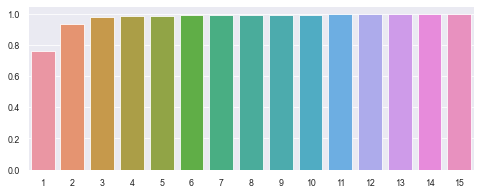

In [115]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (8,3))
sns.set_context('paper')
sns.barplot(x = list(range(1,n_components+1,1)), y = exp_var_cumul)

In [116]:
#Add treatment and target variable on the PCs
sub_df['DaysToBloom'] = df['DaysToBloom']
sub_df['treatment'] = df.Treatment

### Train Test Split

In [117]:
## Data Split
X = sub_df[sub_df.columns[:-2]]
y = sub_df[['treatment','DaysToBloom']]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

train_data = pd.concat([X_train, y_train], axis = 1)
print(f"Train Dataset: {train_data.shape[0]} row/records. F: {train_data[train_data.treatment=='HN'].shape[0]} and N: {train_data[train_data.treatment =='LN'].shape[0]}\n")

test_data = pd.concat([X_test,y_test], axis = 1)
print(f"Train Dataset: {test_data.shape[0]} row/records. F: {test_data[test_data.treatment=='HN'].shape[0]} and N: {test_data[test_data.treatment =='LN'].shape[0]}")



Train Dataset: 583 row/records. F: 213 and N: 370

Train Dataset: 251 row/records. F: 88 and N: 163


## Important Functions

In [118]:
def evaluate_model(y_true,preds):
    r2 = r2_score(y_true,preds)
    rmse = np.sqrt(mean_squared_error(y_true,preds))
    return (r2,rmse)
    

## RF  - Both Treatment

In [119]:
## Initialize Models with default parameters
xb = train_data[list(train_data.columns)[:-2]]
yb = train_data['DaysToBloom']
xb_test = test_data[list(test_data.columns)[:-2]]
yb_test =  test_data['DaysToBloom']


### Train Base Model 

In [120]:
#initialize the ExtraTrees with 100 trees
model_b = ExtraTreesRegressor(100)
model_b.fit(xb,yb)

ExtraTreesRegressor()

In [121]:
#evaluate the base model
preds_b = model_b.predict(xb_test)
score = evaluate_model(yb_test,preds_b)
print(f"Base Model on Both Treatment Evaluation> R2: {score[0]}, RMSE:{score[1]} ")

Base Model on Both Treatment Evaluation> R2: 0.23388034540582636, RMSE:5.899864236401388 


### Hyperparameter Tuning

#### RandomSearchCV

In [122]:
param_grid = {
    'criterion': ['squared_error','absolute_error'],
    'max_depth' : list(np.linspace(5, 200, 10, dtype = int)) + [None],
    'min_samples_split': [5, 7, 10, 14],
    'max_features': ['auto','sqrt','log2'],
    'n_estimators': list(range(20,520,20))

}

In [125]:
#prepare our randomized search cv
rd_ext_b = RandomizedSearchCV(estimator = model_b,param_distributions=param_grid,n_iter =50, cv =3, verbose =1, random_state=101)

In [126]:
#fit our randomzied search cv
rd_ext_b.fit(xb,yb)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=50,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 26, 48, 70, 91, 113,
                                                      135, 156, 178, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200, 220, 240, 260,
                                                         280, 300, 320, 340,
                                                 

In [127]:
#evaluate the base model
preds_b_rs = rd_ext_b.predict(xb_test)
score_rs = evaluate_model(yb_test,preds_b_rs)
print(f"Base Model on Both Treatment Evaluation> R2: {score_rs[0]}, RMSE:{score_rs[1]} ")

Base Model on Both Treatment Evaluation> R2: 0.24089928550212003, RMSE:5.872775727146061 


#### GridSearchCV

In [128]:
#use randomsearchcv results to build a param_grid for gridsearch
param_grid_gr = {
    'criterion':[rd_ext_b.best_params_['criterion']] ,
    'max_depth' :[rd_ext_b.best_params_['max_depth']-2,
                  rd_ext_b.best_params_['max_depth'],
                  rd_ext_b.best_params_['max_depth']+2],
    'min_samples_split': [rd_ext_b.best_params_['min_samples_split']-2,
                  rd_ext_b.best_params_['min_samples_split'],
                  rd_ext_b.best_params_['min_samples_split']+2],
    'max_features': [rd_ext_b.best_params_['max_features']],
    'n_estimators': [rd_ext_b.best_params_['n_estimators']-10,
                  rd_ext_b.best_params_['n_estimators']-5,
                  rd_ext_b.best_params_['n_estimators'], 
                   rd_ext_b.best_params_['n_estimators']+5, 
                    rd_ext_b.best_params_['n_estimators']+10 ]

}

In [129]:
#initialize a GridSearchCv
gr_ext_b = GridSearchCV(estimator = model_b, param_grid = param_grid_gr, 
                               cv = 3, verbose= 5, n_jobs = -1)

In [130]:
#fit the grid
gr_ext_b.fit(xb,yb)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [111, 113, 115], 'max_features': ['auto'],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [450, 455, 460, 465, 470]},
             verbose=5)

In [131]:
#evaluate the random search
#evaluate the base model
preds_b_gr = gr_ext_b.predict(xb_test)
score_gr = evaluate_model(yb_test,preds_b_gr)
print(f"Base Model on Both Treatment Evaluation> R2: {score_gr[0]}, RMSE:{score_gr[1]} ")

Base Model on Both Treatment Evaluation> R2: 0.2346856515097142, RMSE:5.896762602169687 


## RF - Nitrogen Deprived

In [132]:
xn = train_data[train_data.treatment =="LN"][list(train_data.columns)[:-2]]
yn = train_data[train_data.treatment =="LN"]['DaysToBloom']
xn_test = test_data[test_data.treatment =="LN"][list(test_data.columns)[:-2]]
yn_test = test_data[test_data.treatment =="LN"]['DaysToBloom']

#### Train Base Model

In [133]:
#initialize the ExtraTrees with 100 trees
model_n = ExtraTreesRegressor(100)
model_n.fit(xn,yn)

ExtraTreesRegressor()

In [134]:
#evaluate the base model
preds_n = model_n.predict(xn_test)
score_n = evaluate_model(yn_test,preds_n)
print(f"Base Model on Both Treatment Evaluation> R2: {score_n[0]}, RMSE:{score_n[1]} ")

Base Model on Both Treatment Evaluation> R2: 0.2404559402782691, RMSE:5.72755662634386 


#### Hyperparameter Tuning

#### Random Search CV

In [135]:
param_grid_n = {
    'criterion': ['squared_error','absolute_error'],
    'max_depth' : list(np.linspace(5, 200, 10, dtype = int)) + [None],
    'min_samples_split': [5, 7, 10, 14],
    'max_features': ['auto','sqrt','log2'],
    'n_estimators': list(range(20,520,20))

}

In [136]:
#prepare our randomized search cv
rs_ext_n = RandomizedSearchCV(estimator = model_n,param_distributions=param_grid_n,n_iter =100, cv =3, verbose =1, random_state=101)

In [137]:
#fit our randomzied search cv
rs_ext_n.fit(xn,yn)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 26, 48, 70, 91, 113,
                                                      135, 156, 178, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200, 220, 240, 260,
                                                         280, 300, 320, 340,
                                                

In [138]:
#evaluate the base model
preds_n_rs = rs_ext_n.predict(xn_test)
score_rs_n = evaluate_model(yn_test,preds_n_rs)
print(f"Base Model on Both Treatment Evaluation> R2: {score_rs_n[0]}, RMSE:{score_rs_n[1]} ")

Base Model on Both Treatment Evaluation> R2: 0.2624502193036081, RMSE:5.644020401558588 


#### Grid Search Cv 

In [139]:
#use randomsearchcv results to build a param_grid for gridsearch
param_grid_gr_n = {
    'criterion':[rs_ext_n.best_params_['criterion']] ,
    'max_depth' :[rs_ext_n.best_params_['max_depth']-2,
                  rs_ext_n.best_params_['max_depth'],
                  rs_ext_n.best_params_['max_depth']+2],
    'min_samples_split': [rs_ext_n.best_params_['min_samples_split']-2,
                  rs_ext_n.best_params_['min_samples_split'],
                  rs_ext_n.best_params_['min_samples_split']+2],
    'max_features': [rs_ext_n.best_params_['max_features']],
    'n_estimators': [rs_ext_n.best_params_['n_estimators']-10,
                  rs_ext_n.best_params_['n_estimators']-5,
                  rs_ext_n.best_params_['n_estimators'], 
                   rs_ext_n.best_params_['n_estimators']+5, 
                    rs_ext_n.best_params_['n_estimators']+10 ]
}

In [140]:
#initialize a GridSearchCv
gr_ext_n = GridSearchCV(estimator = model_n, param_grid = param_grid_gr_n, 
                               cv = 3, verbose= 5, n_jobs = -1)

In [141]:
#fit the grid
gr_ext_n.fit(xn,yn)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [133, 135, 137], 'max_features': ['auto'],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [450, 455, 460, 465, 470]},
             verbose=5)

In [142]:
#evaluate the random search
#evaluate the base model
preds_n_gr = gr_ext_n.predict(xn_test)
score_gr_n = evaluate_model(yn_test,preds_n_gr)
print(f"Base Model on Both Treatment Evaluation> R2: {score_gr_n[0]}, RMSE:{score_gr_n[1]} ")

Base Model on Both Treatment Evaluation> R2: 0.2644297077201888, RMSE:5.636441401732751 


In [144]:
gr_ext_n.best_params_

{'criterion': 'squared_error',
 'max_depth': 133,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 455}